In [1]:
import pandas as pd
import numpy as np
import matplotlib as mt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Read files:
test=pd.read_csv('C:\\Users\\ASHISH GUSAIN\\Documents\\datasets\\big mart\\Test_u94Q5KV.csv')
train=pd.read_csv('C:\\Users\\ASHISH GUSAIN\\Documents\\datasets\\big mart\\Train_UWu5bXk.csv')

In [3]:
#combining test and train to a single file 'data'
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [4]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [5]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [6]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [7]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

F

In [8]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull()
item_avg_weight

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
          ...  
NCX05    15.200
NCX06    17.600
NCX17    21.250
NCX18    14.150
NCX29    10.000
NCX30    16.700
NCX41    19.000
NCX42     6.360
NCX53    20.100
NCX54     9.195
NCY05    13.500
NCY06    15.250
NCY17    18.200
NCY18     7.285
NCY29    13.650
NCY30    20.250
NCY41    16.750
NCY42     6.380
NCY53    20.000
NCY54     8.430
NCZ05     8.485
NCZ06    19.600
NCZ17    12.150
NCZ18     7.825
NCZ29    15.000
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: It

In [9]:
#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool))


Orignal #missing: 2439


In [10]:
#impute missing vals
data.loc[miss_bool,'Item_Weight']=data.loc[miss_bool,'Item_Identifier'].apply(lambda x:item_avg_weight[x])


In [11]:
print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Final #missing: 0


In [12]:
#Import mode function:
from scipy.stats import mode

In [13]:
#Determing the mode for each 
outlet_size_mode = data.dropna().pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: mode(x).mode[0]) )
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)



Mode for each Outlet_Type:
Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


C:\Users\ASHISH GUSAIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [14]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull()

In [15]:
#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d' % sum(miss_bool))


Orignal #missing: 4016


In [16]:
data.loc[miss_bool,'Outlet_Size']=data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [17]:
print('After imputing: %d'%data.Outlet_Size.isnull().sum())

After imputing: 0


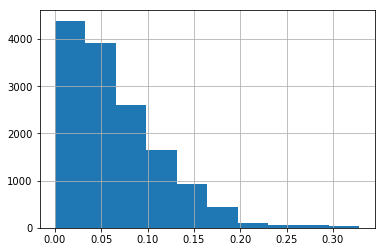

In [18]:
# Outlier detection
data.Item_Visibility.hist()

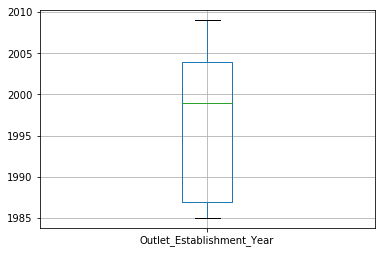

In [19]:
data.boxplot(column='Outlet_Establishment_Year')

In [20]:
Q3=data['Item_Visibility'].quantile(0.25)
Q1=data['Item_Visibility'].quantile(0.75)
IQR=Q3-Q1

In [21]:
data[data.Item_Visibility>Q3+1.5*IQR]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,Small,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,Small,Supermarket Type1,train


In [22]:
data[data.Item_Visibility<Q1-1.5*IQR]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,Small,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,Small,Supermarket Type1,train


In [23]:
mean_value=data.pivot_table(values='Item_Visibility',index='Item_Identifier',aggfunc='mean')

In [24]:
miss_bool=(data.Item_Visibility==0)

In [25]:
data.loc[miss_bool,'Item_Visibility']=data.loc[miss_bool,'Item_Identifier'].apply(lambda x: mean_value[x])

In [26]:
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values after modification: 0


In [27]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 0
Number of 0 values after modification: 0


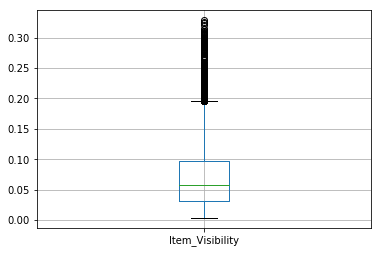

In [28]:
data.boxplot(column='Item_Visibility')

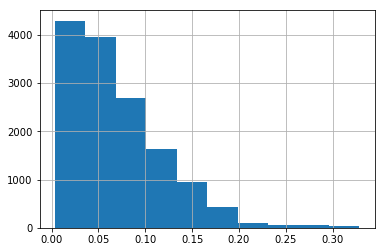

In [29]:
data.Item_Visibility.hist()

In [30]:
(data.Item_Visibility==0)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
14174    False
14175    False
14176    False
14177    False
14178    False
14179    False
14180    False
14181    False
14182    False
14183    False
14184    False
14185    False
14186    False
14187    False
14188    False
14189    False
14190    False
14191    False
14192    False
14193    False
14194    False
14195    False
14196    False
14197    False
14198    False
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Visibility, dtype: bool

In [31]:
data[data.Item_Visibility>Q3+1.5*IQR]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.200,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.057059,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,Small,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,Small,Supermarket Type1,train


In [32]:
#imputing outliers for visibilty
visibility_avg
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

def imputer(value):
    if value<lower_limit or value>upper_limit:
         return visibility_avg
    else:
        return value


In [33]:
result=data.Item_Visibility.apply(imputer)
data.Item_Visibility.apply(imputer)

Item_Identifier,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
0,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
1,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
2,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
3,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
4,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
5,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
6,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
7,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
8,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
9,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479


In [34]:
data.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.200,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.057059,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,Small,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,Small,Supermarket Type1,train


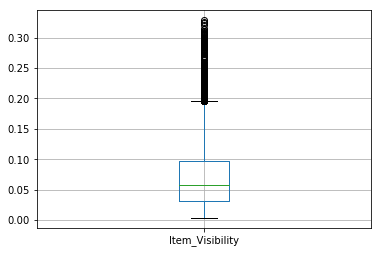

In [35]:
data.boxplot(column='Item_Visibility')

In [36]:
data.Item_Visibility.apply(imputer)

Item_Identifier,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
0,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
1,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
2,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
3,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
4,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
5,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
6,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
7,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
8,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479
9,0.042702,0.045646,0.146722,0.089703,0.007554,0.020596,0.079407,0.026637,0.020653,0.037862,...,0.06303,0.102096,0.085076,0.20106,0.076774,0.030032,0.063445,0.012117,0.02633,0.089479


In [37]:
new=np.log(data.Item_Visibility)

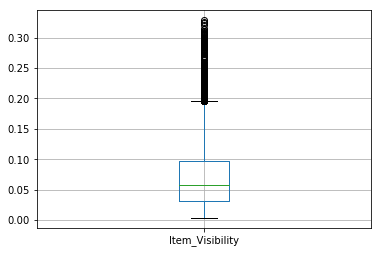

In [38]:
data.boxplot(column='Item_Visibility')

In [39]:
data['Item_Visibility'].head()

0    0.016047
1    0.019278
2    0.016760
3    0.017834
4    0.009780
Name: Item_Visibility, dtype: float64

In [40]:
data[(data.Item_Visibility<=0)]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source


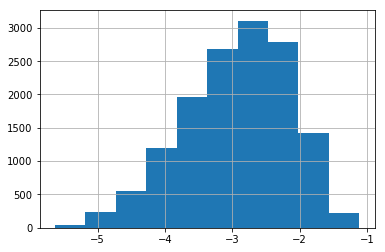

In [41]:
new.hist()

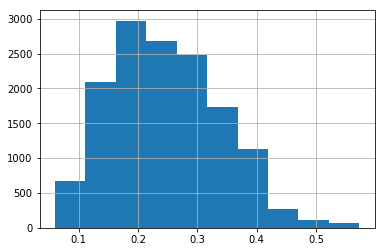

In [42]:
np.sqrt(data.Item_Visibility).hist()

In [43]:
new=np.sqrt(data.Item_Visibility)

In [44]:
new.head()

0    0.126678
1    0.138846
2    0.129461
3    0.133545
4    0.098893
Name: Item_Visibility, dtype: float64

In [45]:
data['Item_Visibility']=new

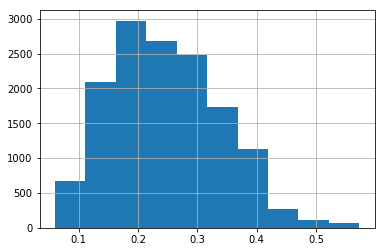

In [46]:
data['Item_Visibility'].hist()

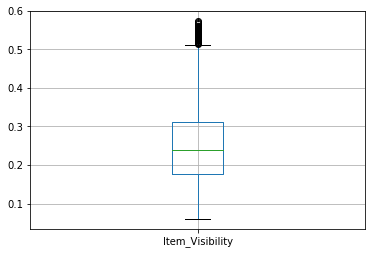

In [47]:
data.boxplot(column='Item_Visibility')

In [48]:
#validate combining idea of type 2 and type 3
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [49]:
#Determine another variable with means ratio
data['Item_Visibility_meanratio']=data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']],axis=1)


In [50]:
print (data['Item_Visibility_meanratio'].describe())

count    14204.000000
mean         4.631823
std          2.041803
min          2.007140
25%          3.147462
50%          4.119896
75%          5.557828
max         20.362014
Name: Item_Visibility_meanratio, dtype: float64


In [51]:
#Get the first two characters of ID:
data['Item_Type_Combined']=data.Item_Identifier.apply(lambda x: x[0:2])

In [52]:
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'FOOD','NC':'NON-CONSUMABLE','DR':'DRINKS'})

In [53]:
data['Item_Type_Combined']

0                  FOOD
1                DRINKS
2                  FOOD
3                  FOOD
4        NON-CONSUMABLE
5                  FOOD
6                  FOOD
7                  FOOD
8                  FOOD
9                  FOOD
10                 FOOD
11                 FOOD
12                 FOOD
13                 FOOD
14                 FOOD
15                 FOOD
16       NON-CONSUMABLE
17                 FOOD
18               DRINKS
19                 FOOD
20                 FOOD
21                 FOOD
22       NON-CONSUMABLE
23                 FOOD
24                 FOOD
25       NON-CONSUMABLE
26                 FOOD
27               DRINKS
28                 FOOD
29                 FOOD
              ...      
14174              FOOD
14175              FOOD
14176              FOOD
14177              FOOD
14178              FOOD
14179              FOOD
14180              FOOD
14181              FOOD
14182            DRINKS
14183              FOOD
14184           

In [54]:
data['Item_Type_Combined'].value_counts()

FOOD              10201
NON-CONSUMABLE     2686
DRINKS             1317
Name: Item_Type_Combined, dtype: int64

In [55]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [56]:
data.pivot_table(values='Item_Outlet_Sales',index='Item_Identifier')

Item_Identifier
DRA12    1843.600200
DRA24    2246.218971
DRA59    2614.430150
DRB01    1518.024000
DRB13    2428.838400
DRB24    3050.695600
DRB25    1661.503900
DRB48     622.903457
DRC01     862.211000
DRC12    2237.420900
DRC13    1632.042250
DRC24    3152.895900
DRC25    1128.816343
DRC27    2743.428900
DRC36    3011.812880
DRC49    2828.318400
DRD01     851.025560
DRD12    1576.709514
DRD13    1232.681143
DRD15    2522.811314
DRD24    1965.156257
DRD25    1740.234750
DRD27    1269.813760
DRD37     892.172000
DRD49    3634.935100
DRD60    2605.275400
DRE01    2908.214400
DRE03     648.298971
DRE12    1546.875333
DRE13    1552.512440
            ...     
NCX05    1274.341200
NCX06    2897.561600
NCX17    3340.096667
NCX18    2413.049429
NCX29    1950.211425
NCX30    3921.562000
NCX41    2364.255800
NCX42    2631.241600
NCX53    2056.323300
NCX54    1678.672029
NCY05     670.460600
NCY06    2375.041760
NCY17     874.328560
NCY18    3229.721822
NCY29     749.857250
NCY30    2942.8360

In [57]:
#new feature-outlet life
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']

In [58]:
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [61]:
# change categories of Item_Fat
print('original vals:')
data.Item_Fat_Content.value_counts()

original vals:


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [63]:
print ('modified categories:')
data.Item_Fat_Content=data.Item_Fat_Content.replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
data.Item_Fat_Content.value_counts()

modified categories:


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [74]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="NON-CONSUMABLE",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le=LabelEncoder()

In [80]:
data['Outlet']=le.fit_transform(data.Outlet_Identifier)

In [85]:
data.Outlet.unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4], dtype=int64)

In [82]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

In [84]:
for i in var_mod:
    data[i]=le.fit_transform(data[i])

In [87]:
#create dummy vars
data=pd.get_dummies(data,columns=['Outlet','Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Item_Fat_Content'])

In [89]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_meanratio    float64
Outlet_Years                   int64
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
Outlet_4                       uint8
Outlet_5                       uint8
Outlet_6                       uint8
Outlet_7                       uint8
Outlet_8                       uint8
Outlet_9                       uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
O

In [90]:

data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)


,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [92]:
# separating test and train
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [98]:
# divide intro train and test:
train=data.loc[data['source']=="train"]
test=data.loc[data['source']=="test"]

In [101]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
# is failing since has been dropped once and code is rer

ValueError: labels ['Item_Outlet_Sales' 'source'] not contained in axis

In [102]:
train.drop(['source'],axis=1,inplace=True)

C:\Users\ASHISH GUSAIN\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [105]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [108]:
ln=LinearRegression()

In [109]:
train=pd.read_csv("train_modified.csv")

In [110]:
test=pd.read_csv("test_modified.csv")

In [123]:
x=train[['Item_MRP','Item_Weight','Item_Visibility','Item_Visibility_meanratio','Outlet_Years','Outlet_0','Outlet_1','Outlet_2','Outlet_3','Outlet_4','Outlet_5','Outlet_6','Outlet_7','Outlet_8','Outlet_9','Outlet_Type_0','Outlet_Type_1','Outlet_Type_2','Outlet_Type_3','Outlet_Location_Type_0','Outlet_Location_Type_1','Outlet_Location_Type_2','Outlet_Size_0','Outlet_Size_1','Outlet_Size_2','Item_Type_Combined_0','Item_Type_Combined_1','Item_Type_Combined_2','Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']]


In [120]:
y =train['Item_Outlet_Sales']
x_test=test[['Item_MRP','Item_Weight','Item_Visibility','Item_Visibility_meanratio','Outlet_Years','Outlet_0','Outlet_1','Outlet_2','Outlet_3','Outlet_4','Outlet_5','Outlet_6','Outlet_7','Outlet_8','Outlet_9','Outlet_Type_0','Outlet_Type_1','Outlet_Type_2','Outlet_Type_3','Outlet_Location_Type_0','Outlet_Location_Type_1','Outlet_Location_Type_2','Outlet_Size_0','Outlet_Size_1','Outlet_Size_2','Item_Type_Combined_0','Item_Type_Combined_1','Item_Type_Combined_2','Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']]

In [124]:
ln.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [127]:
ln.coef_


array([  1.55557693e+01,   3.85143312e-03,  -1.61064103e+02,
        -1.48478874e+00,   1.57952731e+01,  -4.40560670e+02,
        -1.03433703e+02,   1.68485562e+02,  -8.14327687e+01,
        -4.45871218e+02,   5.92522749e+02,   1.61832633e+02,
        -8.21365868e+01,   3.70374574e+02,  -1.39780573e+02,
        -8.86431887e+02,   3.75341907e+02,  -8.14327687e+01,
         5.92522749e+02,  -2.15277217e+02,   2.48181608e+02,
        -3.29043914e+01,  -1.03433703e+02,   3.71309408e+02,
        -2.67875705e+02,  -1.28566791e+00,   1.50413444e+01,
        -1.37556765e+01,  -1.40313132e+01,  -1.37556765e+01,
         2.77869898e+01])

In [126]:
ln.intercept_

-410.83367283815005

In [130]:
ln.score(x,y)

0.56348525078507294

In [131]:
predict=ln.predict(x_test)

In [136]:
predict=np.square(predict)

In [137]:
print(predict)

[  3426355.68492885   2464836.43948105   3509481.97313328 ...,
   3266064.53443572  12511380.59194514   1598215.55642476]
